A multidimensional reduction analysis with Python using `sklearn` library.

Reading materials:

1. [Recovering features names of explained_variance_ratio_ in PCA with sklearn](https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn) on Stack Overflow.
2. [PCA and UMAP with tidymodels and #TidyTuesday cocktail recipes](https://juliasilge.com/blog/cocktail-recipes-umap/) by Julia Silge

In [1]:
# Import modules
from sklearn import decomposition, datasets, preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using Boston housing dataset as example here. See [its page on sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) or on [Kaggle](https://www.kaggle.com/prasadperera/the-boston-housing-dataset).

In [2]:
# Read dataset
boston = datasets.load_boston()

# Normalize dataset with preprocessing.MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
data_rescaled = scaler.fit_transform(boston.data)

# Turn into a Pandas DataFrame, read data and set columns
df = pd.DataFrame(data_rescaled, columns=boston.feature_names)

In [3]:
# Perform PCA
pca = decomposition.PCA(n_components=0.95)
pca.fit(df)
reduced = pca.transform(df)

# Display dataframe of each feature associated with principal components
index_list = [ f"PC-{x}" for x in range(1, len(pca.explained_variance_ratio_)+1) ]
pc_df = pd.DataFrame(pca.components_,columns=df.columns, index=index_list)

Make a plot of cumulative percent explained variance for the principal components

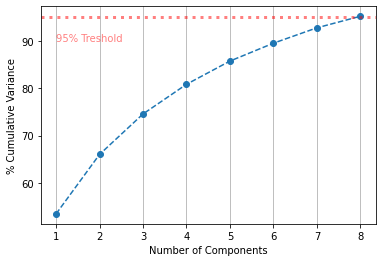

In [4]:
# Plot a chart to show percent explained variance
# Prepare x and y for plotting
x_axis = range(1,len(pca.explained_variance_ratio_)+1)
y_axis = np.cumsum(pca.explained_variance_ratio_) * 100

# Draw and customize the plot
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis, marker="o", linestyle="--")
ax.set_ylabel("% Cumulative Variance")
ax.set_xlabel("Number of Components")
ax.axhline(y=95, color="red", linestyle=":", alpha=0.5, linewidth=3)
ax.text(x=1, y=90, s="95% Treshold", color="red", alpha=0.5)
ax.set_xticks(x_axis)
ax.grid(axis="x")

TIL to transpose a Pandas DataFrame, just use the `.T` attribute. It will swap the position for the row and column. Then let’s make a visualization to see what the components look like and how each feature contribute to each principal component.

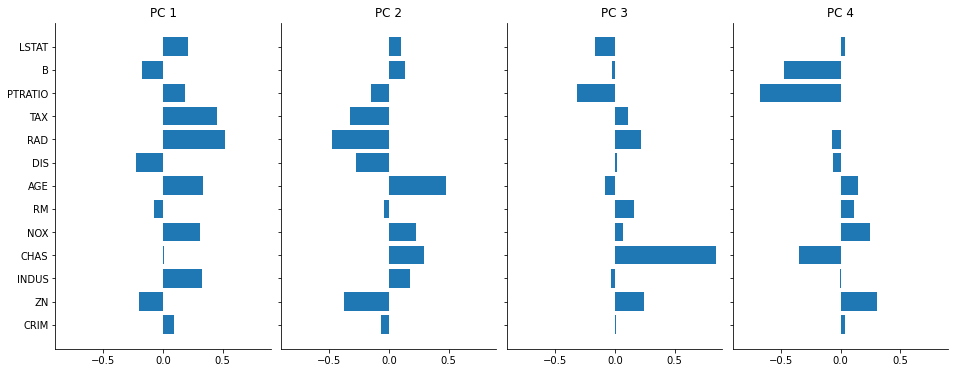

In [5]:
# Instantiate Figure and Axes objects, then adjust the spacing
fig, ax = plt.subplots(ncols=4, figsize=(16,6), sharey=True)
plt.subplots_adjust(wspace=0.05)

# Looper to make the plot
for i in range(len(ax)):
    ax[i].barh(pc_df.T[f"PC-{i+1}"].index, pc_df.T[f"PC-{i+1}"])
    ax[i].set_title(f"PC {i+1}")
    ax[i].set_xlim(-0.9, 0.9)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

Now, time to make a scatterplot of principal components. The dataframe would look different than the one we previously generated (i.e. `pc_df`) because this time we would like to see where individual observations would fall on the 2D scatterplot.

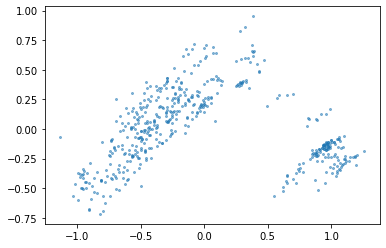

In [6]:
# Generate a new dataframe, PC as columns
data_pc_ind = pd.DataFrame(reduced, columns=index_list)

# Instantiate Figure and Axes objects
fig, ax = plt.subplots()

# Generate that scatterplot
ax.plot(data_pc_ind["PC-1"], data_pc_ind["PC-2"], marker="o", alpha=0.5, markersize=2, linestyle="")

# Show plot
plt.show()